<a href="https://colab.research.google.com/github/brunatoloti/data-science-do-zero/blob/main/Machine%20Learning/SVM/svm_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning - SVM



*   Nesse primeiro notebook, o SVM será aplicado na classificação de flores.
*   Para isso, usaremos o dataset iris.




Importando as bibliotecas

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics, svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importando o dataset iris

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

Visualizando os nomes das features e das classes do dataset

In [ ]:
#Nomes das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#Nomes das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Separando os dados de features dos dados de classe

In [ ]:
features = iris.data

In [ ]:
#Visualizando a forma dos dados das features
features.shape

(150, 4)

In [ ]:
#Visualizando os dados das features
features[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
targets = iris.target

In [ ]:
#Visualizando a forma dos dados das classes
targets.shape

(150,)

In [ ]:
#Visualizando os dados únicos do array de classes
set(targets)

{0, 1, 2}

In [ ]:
#Visualizando os dados das classes
targets[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Visualizando os dados


*   Visualizando a dispersão dos dados das features em relação as classes



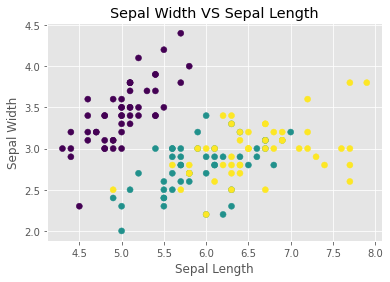

In [ ]:
#Dispersão dos dados de Sepal Width e Sepal Length com as classes (0,1,2)
from matplotlib import style

style.use("ggplot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width VS Sepal Length')
plt.scatter(features[:,0], features[:,1], c=targets) #coloração -> classes

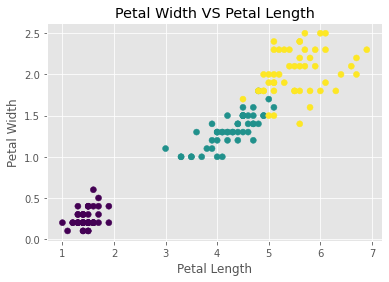

In [ ]:
#Dispersão dos dados de Petal Width e Petal Length com as classes (0,1,2)
from matplotlib import style

style.use("ggplot")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width VS Petal Length')
plt.scatter(features[:,2], features[:,3], c=targets) #coloração -> classes

###Aplicando o SVM



*   Aplicando o SVM para classificar flores usando a base de dados iris.




Usando 80% dos dados para treino e 20% para teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

Visualizando os dados de treino

In [ ]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

Visualizando as classes de treino correspondentes

In [ ]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

Treinando o algoritmo de SVM

In [ ]:
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predizendo valores com a porção de dados de teste

In [ ]:
clf.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Comparando com as classes reais dos dados de teste

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

###Visualizando os resultados da classificação

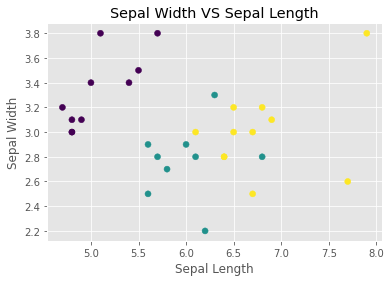

In [ ]:
#Gráfico de dispersão entre as colunas Sepal Length e Sepal Width com as classes preditas
from matplotlib import style

style.use("ggplot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width VS Sepal Length')
plt.scatter(X_test[:,0], X_test[:,1], c=clf.predict(X_test)) #coloração -> resultado do método predict

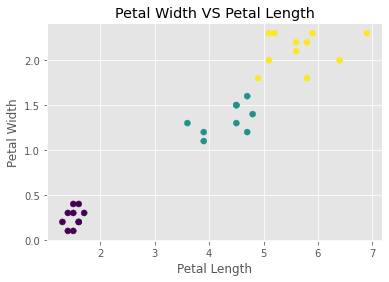

In [ ]:
#Gráfico de dispersão entre as colunas Petal Length e Petal Width com as classes preditas
from matplotlib import style

style.use("ggplot")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width VS Petal Length')
plt.scatter(X_test[:,2], X_test[:,3], c=clf.predict(X_test)) #coloração -> resultado do método predict

Vemos, tanto pelo array de classes preditas comparado ao array de classes reais, quanto pela comparação entre os gráficos feitos anteriormente com esses feitos agora, que nosso modelo não teve erro de classificação nesse caso.

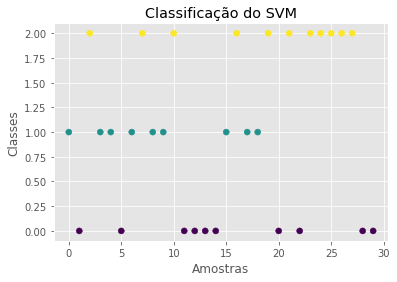

In [ ]:
#Gráfico de dispersão entre as classes e suas predições
from matplotlib import style

style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(y_test)), y_test, c=clf.predict(X_test))

Vemos a partir do gráfico anterior, que, de fato, não houve erro na predição das classes, nesse caso.
Lembrando que a classe 0 é representada pela cor roxa, a classe 1 é representada pela cor verde e a classe 2 é representada pela cor amarela.

###Matriz de Confusão

Conseguimos ver isso com ainda mais clareza usando a Matriz de Confusão

In [ ]:
print(pd.crosstab(y_test, clf.predict(X_test), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0  1   2  All
Real                   
0        10  0   0   10
1         0  9   0    9
2         0  0  11   11
All      10  9  11   30 


###Cross Validation

Criando uma função que retorna a acurácia após fazer o cross validation

In [ ]:
def accuracy(clf, X, y):
    results = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y, results)

In [ ]:
accuracy(clf, features, targets)

0.9733333333333334

Nossa acurácia está muito boa, mas só ela não me diz muita coisa. Preciso obter os resultados de outras métricas de avaliação para concluir se o modelo está se saindo bem com o conjunto de dados ou não.

###Métricas de Avaliação

Imprimindo as métricas: precisão, revocação e medida F1

Em relação aos resultados obtidos usando o Cross Validation

In [ ]:
results = cross_val_predict(clf, features, targets, cv=10)
targets_values = [0, 1, 2]
print(metrics.classification_report(targets, results, targets_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

